In [1]:
%pylab inline
import px4tools
import pandas
import os
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
import px4tools.version
px4tools.version.git_revision

'abf0a7569a96c5a7dd3f1ccdb1451a0812170932'

In [3]:
print('Loading dataset')
d_accel = px4tools.ulog.PX4MessageDict({'sensor_accel_0': 
                                        pandas.read_csv('/home/kabir/kalibration/imu/3/log001_sensor_accel_0.csv')})['sensor_accel_0']
d_gyro = px4tools.ulog.PX4MessageDict({'sensor_gyro_0': 
                                       pandas.read_csv('/home/kabir/kalibration/imu/3/log001_sensor_gyro_0.csv')})['sensor_gyro_0']
print('Loaded dataset')

Loading dataset
Loaded dataset


Starting analysis - Accelerometer
Accelerometer 0 - MPU6000


{'sensor_accel_0_randomwalk_correlation_time': [6601.2997098436281,
  7613.0985788218568,
  0],
 'sensor_accel_0_sig_bi': [0.00036738928990792875,
  0.00055646316919775508,
  0.00050052976562248261],
 'sensor_accel_0_sig_rrw': [2.0366292053641702e-05,
  5.2129496778077437e-05,
  2.7781148169060843e-05],
 'sensor_accel_0_sig_rw': [0.0013010910567174323,
  0.0014093485410279914,
  0.0019194830181246182],
 'sensor_accel_0_tau_0': [1.6880525500151606,
  1.5207759688849676,
  3.1154615791955576],
 'sensor_accel_0_tau_1': [145.55508613496079,
  58.826859038240507,
  152.61905780762496],
 'sensor_accel_0_tau_2': [1134.7952620404587,
  350.05332972052219,
  1085.337390292389]}

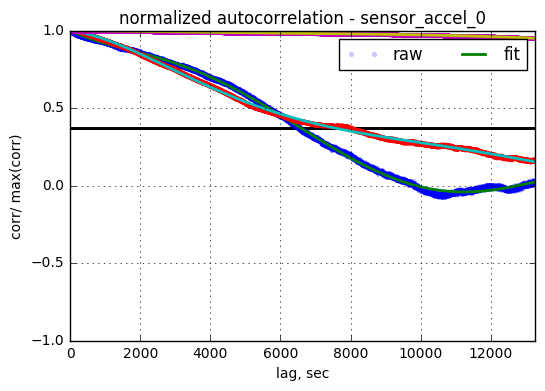

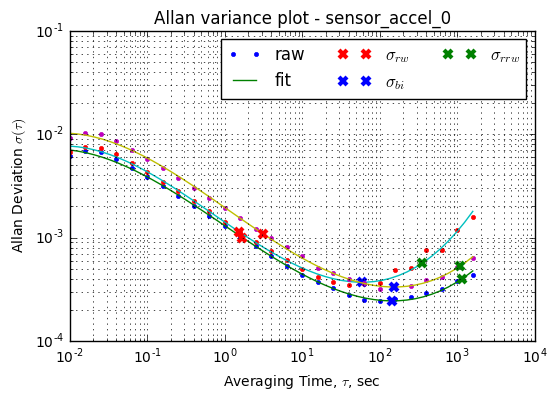

In [5]:
print('Starting analysis - Accelerometer')

print('Accelerometer 0 - MPU6000')
px4tools.ulog.noise_analysis_sensor(d_accel, topic='sensor_accel_0', 
                                    allan_args={'poly_order':3, 'min_intervals':15})

Starting analysis - Gyroscopes
Gyroscope 0 - MPU6000


{'sensor_gyro_0_randomwalk_correlation_time': [16274.560724190729,
  5026.8684519121143,
  11770.273782245044],
 'sensor_gyro_0_sig_bi': [4.1986447470121545e-05,
  4.2590094108943732e-05,
  2.79108977957821e-05],
 'sensor_gyro_0_sig_rrw': [3.12077476099443e-06,
  1.0270992661164278e-05,
  4.2677337044514839e-06],
 'sensor_gyro_0_sig_rw': [7.2712260644000013e-05,
  6.5492750659453612e-05,
  6.390911383553746e-05],
 'sensor_gyro_0_tau_0': [1, 1.7548483830415949, 3.0697021792857893],
 'sensor_gyro_0_tau_1': [46.558264686284453,
  11.390863238409318,
  27.557396759396369],
 'sensor_gyro_0_tau_2': [513.2686709553052,
  55.524959338166468,
  152.91312396186518]}

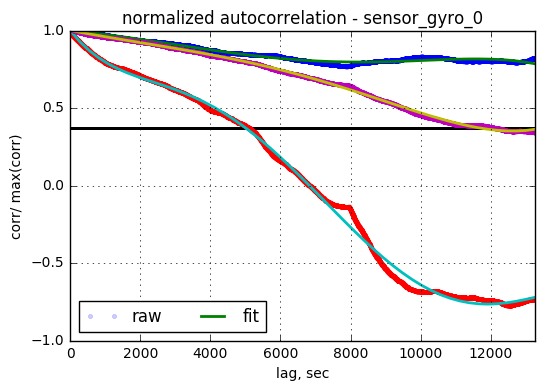

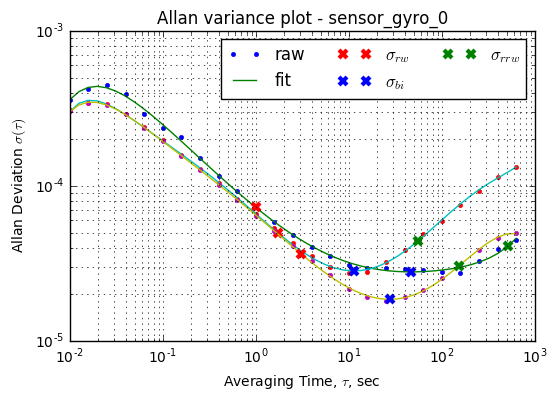

In [9]:
print('Starting analysis - Gyroscopes')

print('Gyroscope 0 - MPU6000')
px4tools.ulog.noise_analysis_sensor(d_gyro, topic='sensor_gyro_0', 
                                    allan_args={'poly_order':7, 'min_intervals':30})